## 2차 과제

- 주제: 데이터 크롤링을 활용한 뉴스 & 리뷰 데이터 분석
- 데이터: 자유롭게 크롤링
- 사용 라이브러리: selenium, beautifulsoup, etc.

### 불용어 참고
https://gist.github.com/HyeongWookKim/f9def910f702d4fffe919bfac230941f

### 1. 뉴스 기사 데이터 크롤링

1.1 원하는 뉴스 기사의 본문을 크롤링하시오.

In [67]:
from bs4 import BeautifulSoup
import requests

url = "https://n.news.naver.com/mnews/article/016/0002281542"

response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

# class 사용시 class_
title = soup.find(class_ = 'media_end_head_title').text

content = soup.find(class_= 'go_trans _article_content').text

print(f"title: {title}")
print("\n")
print(f"content: {content}")

title: 
‘돈잔치’ 지적에도 지난해 은행 퇴직자 최대 11억원 챙겼다[머니뭐니]



content: 
지난해 주요 은행 사업보고서 살펴보니상위 보수자 대부분이 ‘희망퇴직자’은행장보다 높은 연봉…퇴직금이 대부분올해부터 조건 축소…“조건 상향 어려울 것”



서울 한 시중은행 영업점에서 고객들이 창구 업무를 보고 있다.[연합][헤럴드경제=김광우 기자] 지난해 주요 시중은행서 희망퇴직한 은행원들이 한 해 동안 받은 총보수가 최대 11억원을 넘어선 것으로 나타났다. 일부 은행서는 희망퇴직자가 은행장보다 더 많은 보수를 받은 것으로 집계됐다. 다만 올해부터는 막대한 퇴직금 규모가 다소 줄어들 전망이다. 정부와 여론의 ‘돈잔치’ 지적이 이어진 가운데, 주요 은행서 희망퇴직 조건을 일부 축소하고 나선 까닭이다.주요 은행 희망퇴직금만 최대 10억원에 달해17일 주요 은행의 사업보고서에 따르면 지난해 하나은행은 희망퇴직한 관리자 직군 5명에 대해 최대 11억원이 넘는 퇴직금을 지급한 것으로 나타났다. 실제 하나은행서 가장 많은 보수를 받은 관리자는 지난해 급여와 상여금으로 5900만원을 벌었지만, 퇴직금으로만 11억300만원을 받았다.이는 은행장을 포함한 임원과 비교해도 높은 수준이었다. 실제 2023년 하나은행 사업보고서에 공시된 상위 보수지급자 5명 중 임원은 포함되지 않았다. 이승열 은행장은 지난해 총 8억3900만원의 보수를 수령했다.



서울 한 시중은행 영업점 앞을 시민이 지나가고 있다.[연합]여타 은행들에서도 유사한 양상이 나타났다. 우리은행의 지난해 보수지급금액 상위 5명 또한 부장대우 직군의 희망퇴직자 5명이었다. 실제 최대 보수를 받은 직원의 급여 및 상여금은 1700만원에 불과했지만, 퇴직금으로 9억2300만원을 수령했다.이 중 과반은 희망퇴직금이었다. 우리은행은 최대 보수를 받은 직원에 법정퇴직금으로 3억4500만원을 지급했다. 희망퇴직금으로는 그보다 많은 5억7800만원을 책정했다. 사업보고서상 등재된 상위 보수자 모두 희망퇴직금이 법정퇴직금

1.2 크롤링한 본문을 단어 단위로 나누고 각 단어가 나온 횟수와 함께 dataframe 형식으로 변환하시오.

In [68]:
# pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [69]:
from konlpy.tag import Okt
import pandas as pd

okt = Okt()

words = okt.nouns(content) #명사만 추출

# 단어 빈도 계산
word_count = pd.Series(words).value_counts().reset_index()
word_count.columns = ['Word', 'Frequency']

print(word_count)

    Word  Frequency
0     희망         23
1    퇴직금         20
2     은행         19
3     퇴직         15
4     보수         13
..   ...        ...
181  이재근          1
182    전          1
183  이원덕          1
184   모두          1
185    말          1

[186 rows x 2 columns]


1.3 불용어를 제거하시오.

### github에서 불용어리스트 참조!

In [70]:
#stopwords 설정하고 split 통해서 리스트에 넣기
# """ """로 구분해주기!
stopwords_string = """가
가까스로
가령
각
각각
각자
각종
갖고말하자면
같다
같이
개의치않고
거니와
거바
거의
것
것과 같이
것들
게다가
게우다
겨우
견지에서
결과에 이르다
결국
결론을 낼 수 있다
겸사겸사
고려하면
고로
곧
공동으로
과
과연
관계가 있다
관계없이
관련이 있다
관하여
관한
관해서는
구
구체적으로
구토하다
그
그들
그때
그래
그래도
그래서
그러나
그러니
그러니까
그러면
그러므로
그러한즉
그런 까닭에
그런데
그런즉
그럼
그럼에도 불구하고
그렇게 함으로써
그렇지
그렇지 않다면
그렇지 않으면
그렇지만
그렇지않으면
그리고
그리하여
그만이다
그에 따르는
그위에
그저
그중에서
그치지 않다
근거로
근거하여
기대여
기점으로
기준으로
기타
까닭으로
까악
까지
까지 미치다
까지도
꽈당
끙끙
끼익
나
나머지는
남들
남짓
너
너희
너희들
네
넷
년
논하지 않다
놀라다
누가 알겠는가
누구
다른
다른 방면으로
다만
다섯
다소
다수
다시 말하자면
다시말하면
다음
다음에
다음으로
단지
답다
당신
당장
대로 하다
대하면
대하여
대해 말하자면
대해서
댕그
더구나
더군다나
더라도
더불어
더욱더
더욱이는
도달하다
도착하다
동시에
동안
된바에야
된이상
두번째로
둘
둥둥
뒤따라
뒤이어
든간에
들
등
등등
딩동
따라
따라서
따위
따지지 않다
딱
때
때가 되어
때문에
또
또한
뚝뚝
라 해도
령
로
로 인하여
로부터
로써
륙
를
마음대로
마저
마저도
마치
막론하고
만 못하다
만약
만약에
만은 아니다
만이 아니다
만일
만큼
말하자면
말할것도 없고
매
매번
메쓰겁다
몇
모
모두
무렵
무릎쓰고
무슨
무엇
무엇때문에
물론
및
바꾸어말하면
바꾸어말하자면
바꾸어서 말하면
바꾸어서 한다면
바꿔 말하면
바로
바와같이
밖에 안된다
반대로
반대로 말하자면
반드시
버금
보는데서
보다더
보드득
본대로
봐
봐라
부류의 사람들
부터
불구하고
불문하고
붕붕
비걱거리다
비교적
비길수 없다
비로소
비록
비슷하다
비추어 보아
비하면
뿐만 아니라
뿐만아니라
뿐이다
삐걱
삐걱거리다
사
삼
상대적으로 말하자면
생각한대로
설령
설마
설사
셋
소생
소인
솨
쉿
습니까
습니다
시각
시간
시작하여
시초에
시키다
실로
심지어
아
아니
아니나다를가
아니라면
아니면
아니었다면
아래윗
아무거나
아무도
아야
아울러
아이
아이고
아이구
아이야
아이쿠
아하
아홉
안 그러면
않기 위하여
않기 위해서
알 수 있다
알았어
앗
앞에서
앞의것
야
약간
양자
어
어기여차
어느
어느 년도
어느것
어느곳
어느때
어느쪽
어느해
어디
어때
어떠한
어떤
어떤것
어떤것들
어떻게
어떻해
어이
어째서
어쨋든
어쩔수 없다
어찌
어찌됏든
어찌됏어
어찌하든지
어찌하여
언제
언젠가
얼마
얼마 안 되는 것
얼마간
얼마나
얼마든지
얼마만큼
얼마큼
엉엉
에
에 가서
에 달려 있다
에 대해
에 있다
에 한하다
에게
에서
여
여기
여덟
여러분
여보시오
여부
여섯
여전히
여차
연관되다
연이서
영
영차
옆사람
예
예를 들면
예를 들자면
예컨대
예하면
오
오로지
오르다
오자마자
오직
오호
오히려
와
와 같은 사람들
와르르
와아
왜
왜냐하면
외에도
요만큼
요만한 것
요만한걸
요컨대
우르르
우리
우리들
우선
우에 종합한것과같이
운운
월
위에서 서술한바와같이
위하여
위해서
윙윙
육
으로
으로 인하여
으로서
으로써
을
응
응당
의
의거하여
의지하여
의해
의해되다
의해서
이
이 되다
이 때문에
이 밖에
이 외에
이 정도의
이것
이곳
이때
이라면
이래
이러이러하다
이러한
이런
이럴정도로
이렇게 많은 것
이렇게되면
이렇게말하자면
이렇구나
이로 인하여
이르기까지
이리하여
이만큼
이번
이봐
이상
이어서
이었다
이와 같다
이와 같은
이와 반대로
이와같다면
이외에도
이용하여
이유만으로
이젠
이지만
이쪽
이천구
이천육
이천칠
이천팔
인 듯하다
인젠
일
일것이다
일곱
일단
일때
일반적으로
일지라도
임에 틀림없다
입각하여
입장에서
잇따라
있다
자
자기
자기집
자마자
자신
잠깐
잠시
저
저것
저것만큼
저기
저쪽
저희
전부
전자
전후
점에서 보아
정도에 이르다
제
제각기
제외하고
조금
조차
조차도
졸졸
좀
좋아
좍좍
주룩주룩
주저하지 않고
줄은 몰랏다
줄은모른다
중에서
중의하나
즈음하여
즉
즉시
지든지
지만
지말고
진짜로
쪽으로
차라리
참
참나
첫번째로
쳇
총적으로
총적으로 말하면
총적으로 보면
칠
콸콸
쾅쾅
쿵
타다
타인
탕탕
토하다
통하여
툭
퉤
틈타
팍
팔
퍽
펄렁
하
하게될것이다
하게하다
하겠는가
하고 있다
하고있었다
하곤하였다
하구나
하기 때문에
하기 위하여
하기는한데
하기만 하면
하기보다는
하기에
하나
하느니
하는 김에
하는 편이 낫다
하는것도
하는것만 못하다
하는것이 낫다
하는바
하더라도
하도다
하도록시키다
하도록하다
하든지
하려고하다
하마터면
하면 할수록
하면된다
하면서
하물며
하여금
하여야
하자마자
하지 않는다면
하지 않도록
하지마
하지마라
하지만
하하
한 까닭에
한 이유는
한 후
한다면
한다면 몰라도
한데
한마디
한적이있다
한켠으로는
한항목
할 따름이다
할 생각이다
할 줄 안다
할 지경이다
할 힘이 있다
할때
할만하다
할망정
할뿐
할수있다
할수있어
할줄알다
할지라도
할지언정
함께
해도된다
해도좋다
해봐요
해서는 안된다
해야한다
해요
했어요
향하다
향하여
향해서
허
허걱
허허
헉
헉헉
헐떡헐떡
형식으로 쓰여
혹시
혹은
혼자
훨씬
휘익
휴
흐흐
흥
힘입어"""

stopwords_list = stopwords_string.split()

print(stopwords_list)

['가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과', '같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에', '이르다', '결국', '결론을', '낼', '수', '있다', '겸사겸사', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가', '있다', '관계없이', '관련이', '있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '그때', '그래', '그래도', '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런', '까닭에', '그런데', '그런즉', '그럼', '그럼에도', '불구하고', '그렇게', '함으로써', '그렇지', '그렇지', '않다면', '그렇지', '않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에', '따르는', '그위에', '그저', '그중에서', '그치지', '않다', '근거로', '근거하여', '기대여', '기점으로', '기준으로', '기타', '까닭으로', '까악', '까지', '까지', '미치다', '까지도', '꽈당', '끙끙', '끼익', '나', '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지', '않다', '놀라다', '누가', '알겠는가', '누구', '다른', '다른', '방면으로', '다만', '다섯', '다소', '다수', '다시', '말하자면', '다시말하면', '다음', '다음에', '다음으로', '단지', '답다', '당신', '당장', '대로', '하다', '대하면', '대하여', '대해', '말하자면', '대해서', '댕그', '더구나', '더군다나', '더라도', '더불어', '더욱더', '더욱이는', '도달하다', '도착하

In [71]:
print(words) #본문에서 명사만 출력한 것

['지난해', '주요', '은행', '사업', '보고서', '상위', '보수', '대부분', '희망', '퇴직', '은행', '연봉', '퇴직금', '대부분', '올해', '조건', '축소', '조건', '상향', '것', '서울', '시중', '은행', '영업', '점', '고객', '창구', '업무', '보고', '연합', '헤럴드경제', '김광', '기자', '지난해', '주요', '시중', '은행', '희망', '퇴직', '은행원', '해', '동안', '보수', '최대', '것', '일부', '은행', '희망', '퇴직', '은행', '더', '보수', '것', '집계', '다만', '올해', '막대', '퇴직금', '규모', '다소', '전망', '정부', '여론', '돈', '잔치', '지적', '이어진', '가운데', '주요', '은행', '희망', '퇴직', '조건', '일부', '축소', '나선', '까닭', '주요', '은행', '희망', '퇴직금', '최대', '주요', '은행', '사업', '보고서', '지난해', '하나은행', '희망', '퇴직', '관리자', '직', '명', '대해', '최대', '퇴직금', '지급', '것', '실제', '하나은행', '가장', '보수', '관리자', '지난해', '급여', '상여금', '퇴직금', '은행', '포함', '임원', '비교', '수준', '실제', '하나은행', '사업', '보고서', '공시', '상위', '보수', '지급', '명', '중', '임원', '포함', '이승열', '은행', '지난해', '총', '보수', '수령', '서울', '시중', '은행', '영업', '점', '앞', '시민', '연합', '여타', '은행', '양상', '우리은행', '지난해', '보수', '지급', '금액', '상위', '명', '또한', '부장', '대우', '직', '희망', '퇴직', '명', '실제', '최대', '보수', '직원', '급여', '및', '상여금', '퇴직금', '수령'

In [72]:
# 불용어 제거
filtered_content = [filtered_content for filtered_content in words if filtered_content not in stopwords_list]
print(filtered_content)

['지난해', '주요', '은행', '사업', '보고서', '상위', '보수', '대부분', '희망', '퇴직', '은행', '연봉', '퇴직금', '대부분', '올해', '조건', '축소', '조건', '상향', '서울', '시중', '은행', '영업', '점', '고객', '창구', '업무', '보고', '연합', '헤럴드경제', '김광', '기자', '지난해', '주요', '시중', '은행', '희망', '퇴직', '은행원', '해', '보수', '최대', '일부', '은행', '희망', '퇴직', '은행', '더', '보수', '집계', '올해', '막대', '퇴직금', '규모', '전망', '정부', '여론', '돈', '잔치', '지적', '이어진', '가운데', '주요', '은행', '희망', '퇴직', '조건', '일부', '축소', '나선', '까닭', '주요', '은행', '희망', '퇴직금', '최대', '주요', '은행', '사업', '보고서', '지난해', '하나은행', '희망', '퇴직', '관리자', '직', '명', '최대', '퇴직금', '지급', '실제', '하나은행', '가장', '보수', '관리자', '지난해', '급여', '상여금', '퇴직금', '은행', '포함', '임원', '비교', '수준', '실제', '하나은행', '사업', '보고서', '공시', '상위', '보수', '지급', '명', '중', '임원', '포함', '이승열', '은행', '지난해', '총', '보수', '수령', '서울', '시중', '은행', '영업', '점', '앞', '시민', '연합', '여타', '은행', '양상', '우리은행', '지난해', '보수', '지급', '금액', '상위', '명', '부장', '대우', '직', '희망', '퇴직', '명', '실제', '최대', '보수', '직원', '급여', '상여금', '퇴직금', '수령', '중', '과반', '희망', '퇴직금', '우리은행', '최대', '보수', '직원', '법정

1.4 처리한 데이터를 워드아트로 변환해 어떤 단어가 가장 많이 나왔는지 확인하시오(폰트, 색 등 자유).

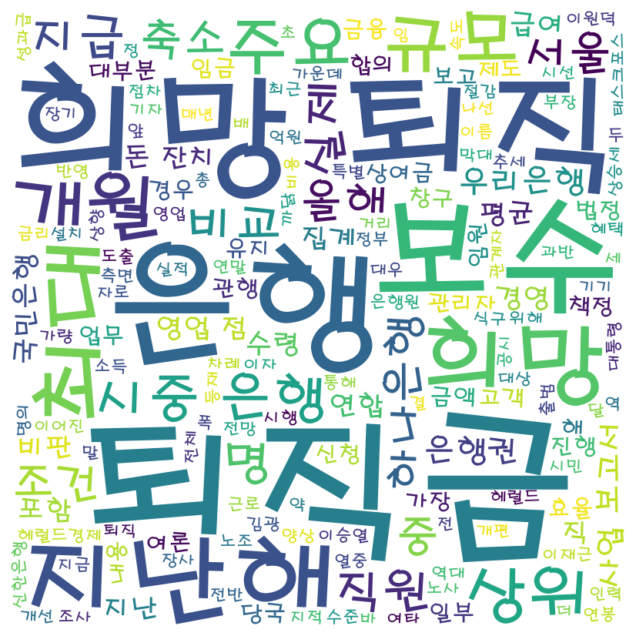

In [73]:
from cgitb import text
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#불용어 제거된 단어 리스트를 공백으로 구분된 문자열로 반환하기
filtered_content_str = ' '.join(filtered_content)


wordcloud = WordCloud(font_path = "./H2PORM.TTF",
                      stopwords = stopwords_list,
                      background_color = 'white',
                      width=800,
                      height=800).generate(filtered_content_str)          

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 축 숨기기
plt.show()          

### 2. 플레이스토어 리뷰 데이터 크롤링(동적 크롤링)

참고 https://brave-greenfrog.tistory.com/44

2.1 100개 이상의 리뷰를 가진 앱에 있는 댓글 리뷰를 크롤링하시오.

### WebDriver 다운받기

In [74]:
# !pip install webdriver-manager

## selenuim과 webdriver 최신 버전으로 업데이트

In [75]:
# pip install --upgrade selenium webdriver-manager

참고 사이트
https://chromedriver.chromium.org/downloads

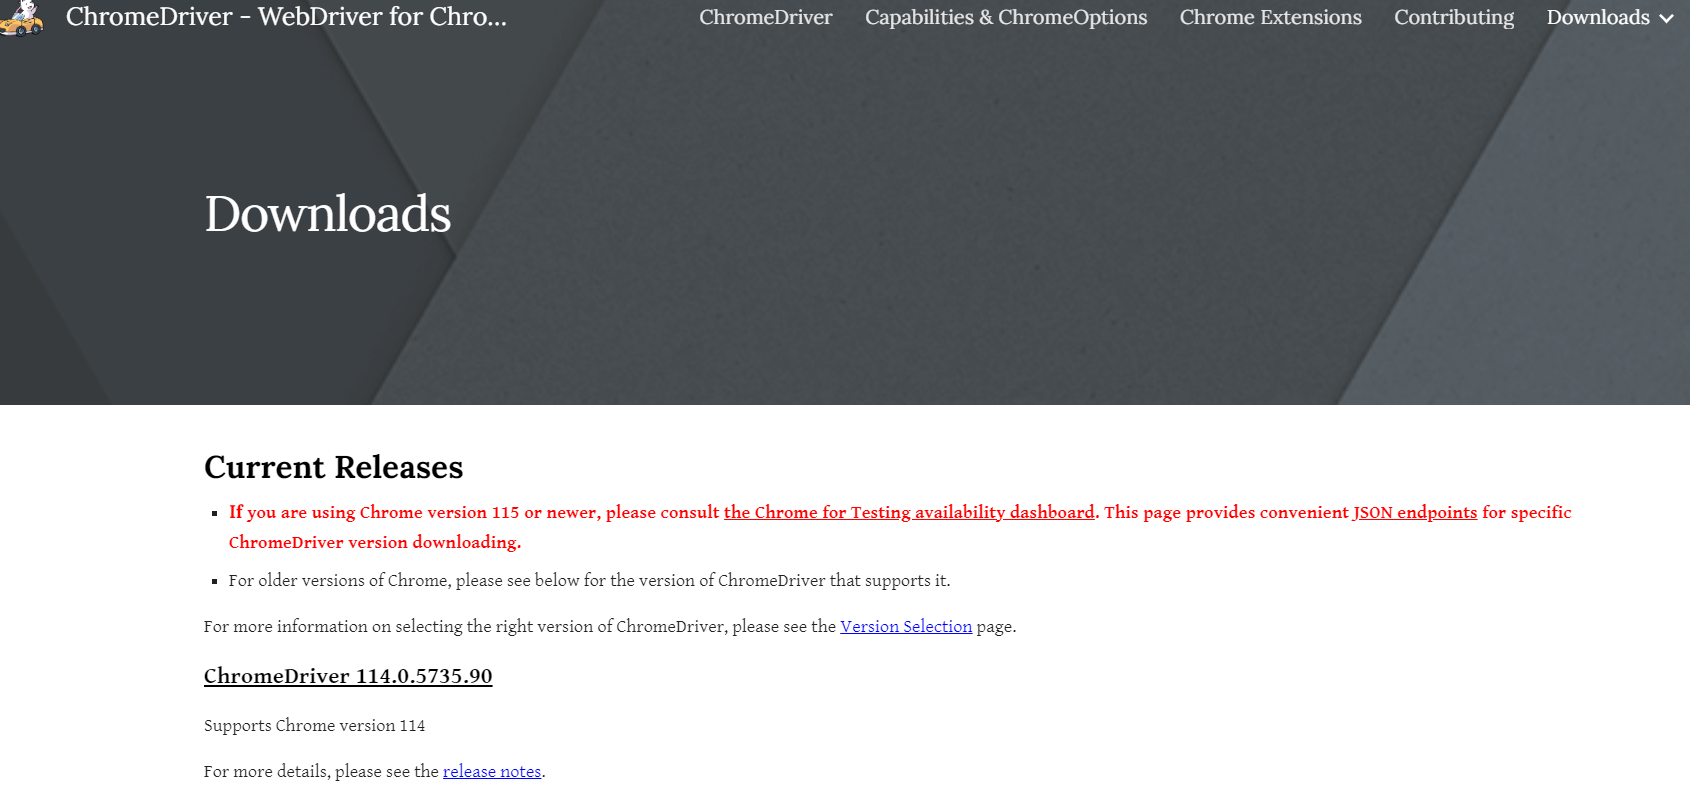

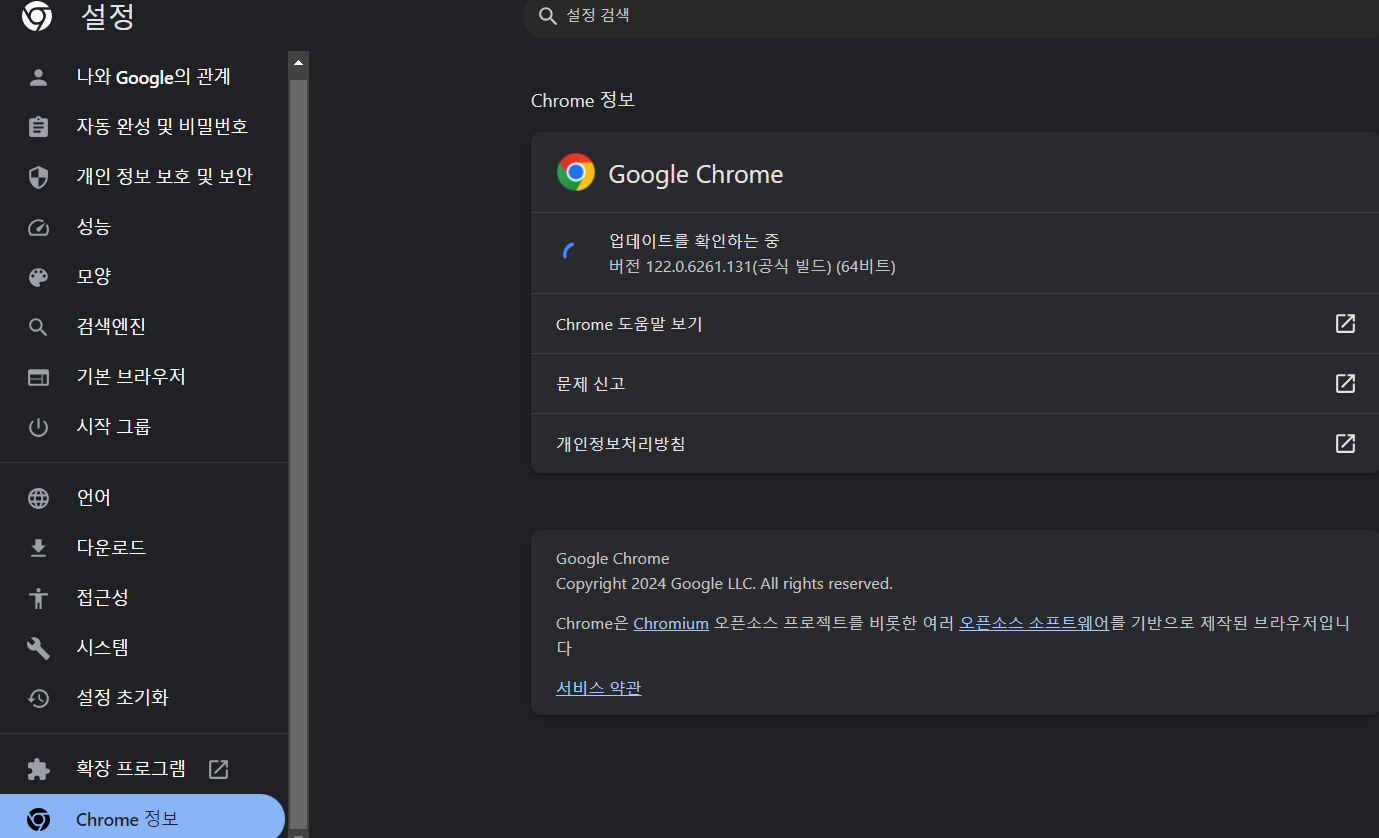

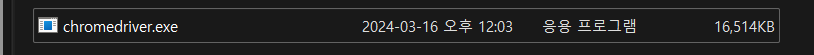

In [76]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import datetime
import time

options = Options()
service = Service(executable_path='C:/Users/vivid/Desktop/DAT/2024-1/chromedriver.exe')
driver = webdriver.Chrome(service=service, options=options)
driver.set_window_size(1400, 1000)

# 쿠키런 리뷰 방문
driver.get('https://play.google.com/store/apps/details?id=com.devsisters.ck&pcampaignid=merch_published_cluster_promotion_battlestar_top_picks&hl=ko-KR')

#전체 리뷰보기 클릭
WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="yDmH0d"]/c-wiz[2]/div/div/div[1]/div/div[2]/div/div[1]/div[1]/c-wiz[5]/section/div/div[2]/div[5]/div/div/button/span'))).click()

#iframe으로 이동 (새로운 페이지 뜨길래 iframe인지 알았는데 아니 었음)
WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="yDmH0d"]/div[4]/div[2]/div/div/div/div/div[1]/div/div/h5')))

#팝업창의 xpath를 찾아서 스코롤하기

all_reviews = driver.find_element(by=By.XPATH, value ='//*[@id="yDmH0d"]/div[4]/div[2]/div/div/div/div/div[2]')

for i in range(10):
    driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', all_reviews)
    time.sleep(1)
    print(f"{i}번째 scrool중입니다.")

data = pd.DataFrame(data=[], columns=['이름', '별점', '리뷰'])


names = driver.find_elements(By.CLASS_NAME, "X5PpBb")
rating = driver.find_elements(By.CLASS_NAME, "iXRFPc")
reviews = driver.find_elements(By.CLASS_NAME, "h3YV2d")

for i in range(len(reviews)):
    tmp = []
    tmp.append(names[i].text)
    tmp.append(rating[i].get_attribute('aria-label'))
    tmp.append(reviews[i].text)

    tmp = pd.DataFrame(data=[tmp], columns= data.columns)
    data = pd.concat([data, tmp])

print("크롤링 완료")

names = [element.text for element in driver.find_elements(By.CLASS_NAME, "X5PpBb")]
#rating의 경우 text를 가져오기 때문에 get_attribute
rating = [element.get_attribute('aria-label') for element in driver.find_elements(By.CLASS_NAME, "iXRFPc")]
reviews = [element.text for element in driver.find_elements(By.CLASS_NAME, "h3YV2d")]

# print(names)
# print(rating)
# print(reviews)


# driver.quit()

0번째 scrool중입니다.
1번째 scrool중입니다.
2번째 scrool중입니다.
3번째 scrool중입니다.
4번째 scrool중입니다.
5번째 scrool중입니다.
6번째 scrool중입니다.
7번째 scrool중입니다.
8번째 scrool중입니다.
9번째 scrool중입니다.
크롤링 완료


참고: 팝업 div를 찾아서 스크롤 내리기
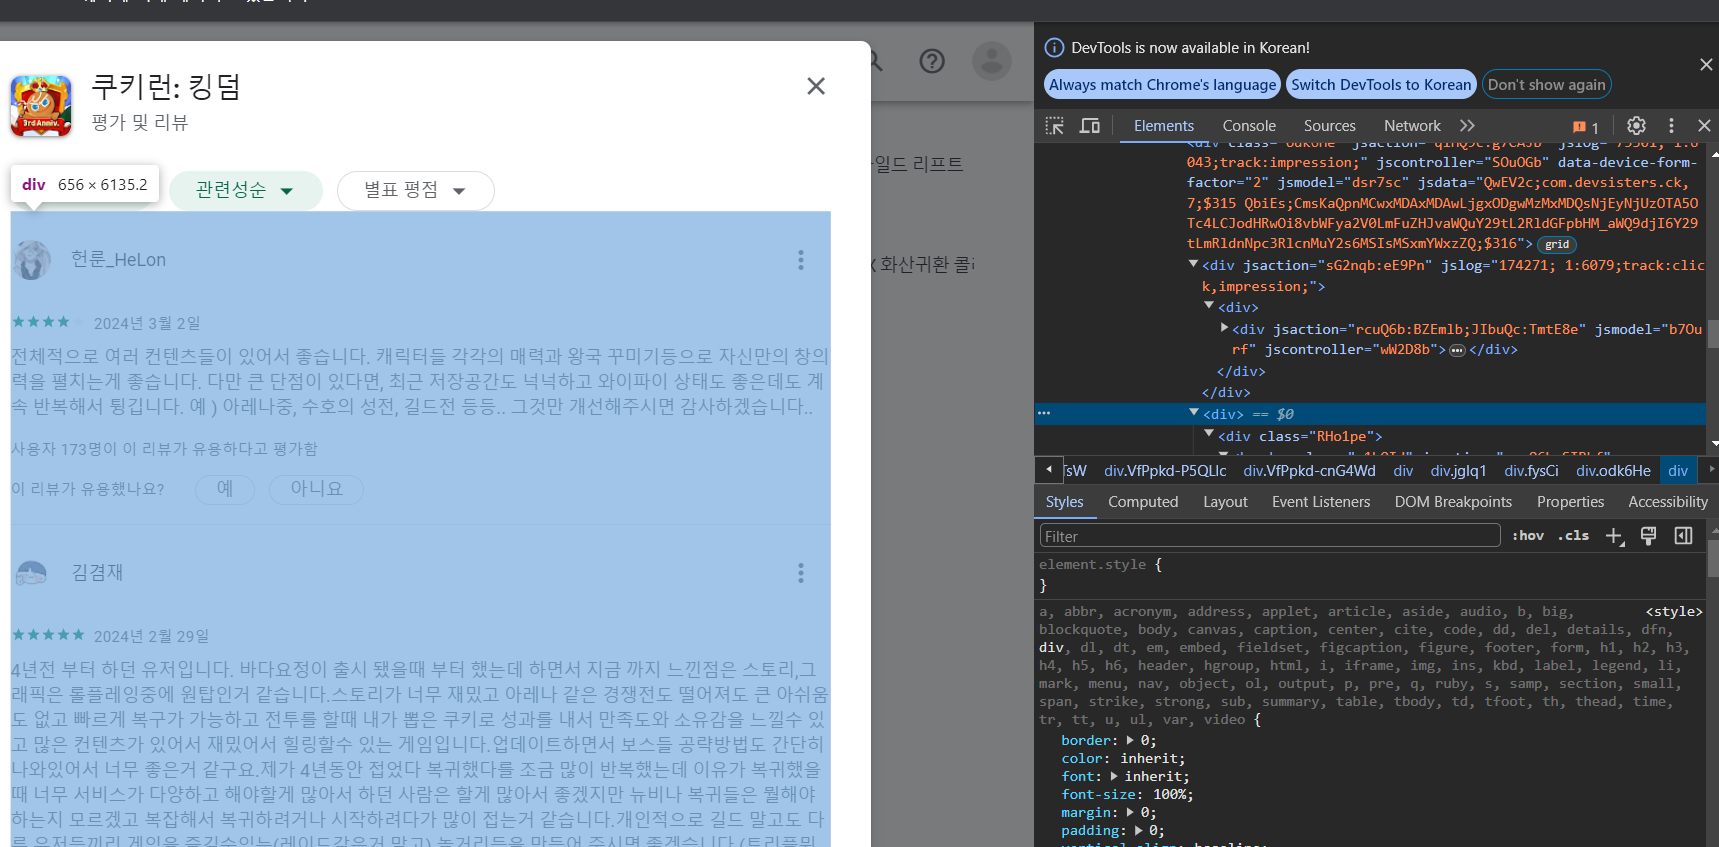

class

이름: X5PpBb

별점: iXRFPc

내용: h3YV2d

2.2 크롤링한 데이터를 dataframe 형태로 변환하시오(날짜, 별점, 리뷰 유저 등).

In [80]:
data.head(30)
# 처음 3명은 겹치니 버리기!

,이름,별점,리뷰
0,,별표 5개 만점에 4개를 받았습니다.,
0,김겸재,별표 5개 만점에 5개를 받았습니다.,4년전 부터 하던 유저입니다. 바다요정이 출시 됐을때 부터 했는데 하면서 지금 까지...
0,전애경,별표 5개 만점에 5개를 받았습니다.,게임이 재밌고 좋은게임은 맞습니다 근데 장점과 단점이 있습니다 먼저 장점1.현질을하...
0,헌룬_HeLon,별표 5개 만점에 4개를 받았습니다.,전체적으로 여러 컨텐츠들이 있어서 좋습니다. 캐릭터들 각각의 매력과 왕국 꾸미기등으...
0,김겸재,별표 5개 만점에 5개를 받았습니다.,4년전 부터 하던 유저입니다. 바다요정이 출시 됐을때 부터 했는데 하면서 지금 까지...
0,전애경,별표 5개 만점에 5개를 받았습니다.,게임이 재밌고 좋은게임은 맞습니다 근데 장점과 단점이 있습니다 먼저 장점1.현질을하...
0,김쏙독,별표 5개 만점에 4개를 받았습니다.,소과금을 하면서도 무리없이 게임을 즐기고 있습니다. 항상 감사합니다. 게임을 플레이...
0,남이기승,별표 5개 만점에 4개를 받았습니다.,"다양한 쿠키가 있고 방대한 스토리에, 여러 즐길 거리가 넘쳐납니다. 금세 빠져들게 ..."
0,윤영란,별표 5개 만점에 5개를 받았습니다.,"약 2년 정도 플레이한 유저입니다. 먼저 제가 말하는 의견은 지극히 ""제 의견""입니..."
0,J hee J,별표 5개 만점에 4개를 받았습니다.,스토리도 재밌고 다 좋은데 업데이트가 너무 잦아서 제 저장공간이 부족해요..물론 새...


In [79]:
data.count()

이름    223
별점    223
리뷰    223
dtype: int64

In [81]:
data.to_csv("./쿠키런_review.csv")

2.3 긍정 리뷰와 부정 리뷰를 나누시오(기준은 자유).

긍정: 별점이 4개이면서 좋은 내용 (복귀,재미있게, 업데이트, 재미, 충분히, 매력 )

부정: 망겜, 단점, 지루, 부족,오류...

중립: 장단점 설명하는 리뷰

### 3. 자유 분석

3.1 위에서 크롤링한 데이터들을 활용해 자유롭게 인사이트를 도출하시오.

In [82]:
data.리뷰

0                                                     
0    4년전 부터 하던 유저입니다. 바다요정이 출시 됐을때 부터 했는데 하면서 지금 까지...
0    게임이 재밌고 좋은게임은 맞습니다 근데 장점과 단점이 있습니다 먼저 장점1.현질을하...
0    전체적으로 여러 컨텐츠들이 있어서 좋습니다. 캐릭터들 각각의 매력과 왕국 꾸미기등으...
0    4년전 부터 하던 유저입니다. 바다요정이 출시 됐을때 부터 했는데 하면서 지금 까지...
                           ...                        
0    시작한지 한달. 차라리 레벨 999가 만렙이라 레벨 올리는 재미 느끼게 해주고, 동...
0    처음에는 쉽고 재미있었는데 이거 장난하나요 무과금은 그냥 접으라는듯이 갑자기 골치와...
0    세인트 릴리 쿠키가 새로 나온다고 해서 업데이트 하고 다시 들어갔더니 쉐도우 밀크쿠...
0    아주 재밌어서 다른사람도 강력 추천합니다 그리고너무 재밌어서 하다가 시계를 봤는데 ...
0    현질유도가 심하고 뭐 2년동안 열심히 당기면 왠만한 사람은 따라잡는데 자잘한 뽑기 ...
Name: 리뷰, Length: 223, dtype: object

In [83]:
df = pd.DataFrame(data, columns=['리뷰'])

In [84]:
def extract_nouns(text):
    nouns = okt.nouns(text)
    return nouns

df['명사'] = df['리뷰'].apply(extract_nouns)

In [85]:
def remove_stopwords(nouns):
    return [word for word in nouns if word not in stopwords_list]

df['명사_불용어제거'] = df['명사'].apply(remove_stopwords)

In [86]:
df['명사_불용어제거']

0                                                   []
0    [유저, 바다, 정이, 출시, 지금, 점, 스토리, 그래픽, 롤플레잉, 탑, 스토리...
0    [게임, 게임, 장점, 단점, 먼저, 장점, 현질, 크리스탈, 게임, 자동, 전투,...
0    [전체, 여러, 컨텐츠, 캐릭터, 매력, 왕국, 창의력, 단점, 최근, 장공, 와이...
0    [유저, 바다, 정이, 출시, 지금, 점, 스토리, 그래픽, 롤플레잉, 탑, 스토리...
                           ...                        
0    [시작, 한지, 달, 레벨, 만렙, 레벨, 재미, 동시, 자동, 사냥, 영토, 칸,...
0    [처음, 거, 장난, 하나요, 무과, 금은, 그냥, 듯이, 갑자기, 골치, 세인트,...
0    [세인트, 릴리, 쿠키, 업데이트, 쉐도우, 밀크, 쿠키, 여행, 버전, 광대, 레...
0        [아주, 다른사람, 강력, 추천, 시계, 지나, 완전, 겜, 뽑기, 거가, 기대]
0    [현질, 유도, 뭐, 사람, 뽑기, 확률, 기간, 한정, 뽑기, 걸, 제대로, 뽕,...
Name: 명사_불용어제거, Length: 223, dtype: object

In [90]:
from collections import Counter

#모든 리뷰의 명사를 하나의 리스트로 합침
all_nouns = sum(df['명사_불용어제거'].tolist(), [])

#단어 빈도수 계산
word_counts = Counter(all_nouns)

# TOP 10 보여주기
print(word_counts.most_common(20))

[('게임', 307), ('쿠키', 214), ('유저', 118), ('스토리', 99), ('단점', 91), ('과금', 87), ('업데이트', 80), ('플레이', 70), ('점', 67), ('현질', 65), ('장점', 64), ('뽑기', 60), ('정말', 57), ('생각', 55), ('무', 54), ('아레나', 50), ('캐릭터', 50), ('개', 49), ('킹덤', 49), ('이벤트', 46)]


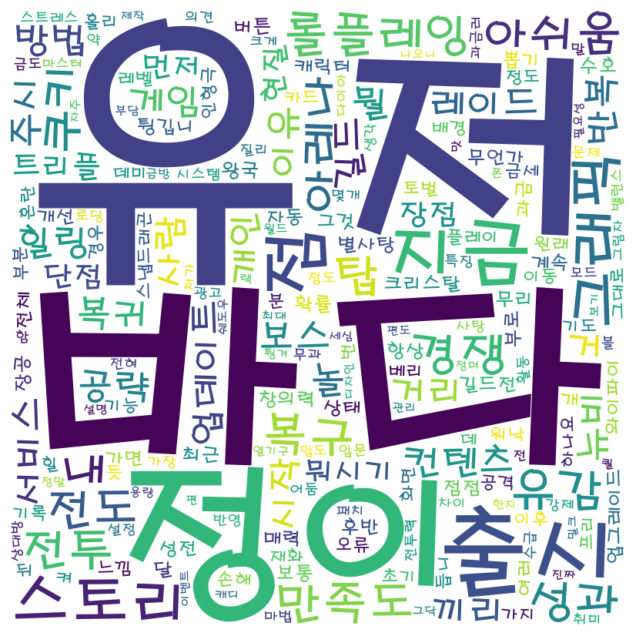

In [89]:
from cgitb import text
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#불용어 제거된 단어 리스트를 공백으로 구분된 문자열로 반환하기
word_countst_str = ' '.join(word_counts)


wordcloud = WordCloud(font_path = "./H2PORM.TTF",
                      stopwords = stopwords_list,
                      background_color = 'white',
                      width=800,
                      height=800).generate(word_countst_str)          

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 축 숨기기
plt.show()          

# wordcloud를 보면 여론이...반반인 것 같다